## Fundemantal Concepts toward Understanding Gaussian Process

The purpose of this notebook is to introduce **essential concepts** for the sake of understanding **Gaussian Process**, a powerful machine learning model to predict the shape of a function while giving corresponding **uncertainties** for beginners. Some Concepts will come with **python code examples**.
The notebook is formated into three main parts.
1. **Mathematic Concepts**
- Vectors and Matrices
- Eigenvalues / Eigenvectors and Matrix Properties
2. **Statistic Concepts**
- Random Variables
- Mean, Variance, and Standard Deviation
- Covariance and Correlation
- Gaussian Distribution
- Multidimension Gaussian Distribution
- The Central Limit Theorem
- Probability Theory Basics
- Probability and Likelihood
- Baye's Theorem
3. **Machine Learning Concepts**
- Machine Learning Essentials
- Machine Learning Categories
- Regression
- Maximum A Posteriori (MAP)
- True Bayesian Prediction
- Kernel Methods

### **Mathematic Concepts**
#### 1. Vectors and Matrices
##### Vectors
A vector is an ordered list of numbers, represented as a row: $x=[x_1,x_2,x_3]$. In python, it is usually represented as a list `x=[x1,x2,x3]`. A more common way to manipulate vectors in python is through np.array, which can be defined by converting a list or with numbers. `x_np=np.array([1,2,3])`.Multidimensional arrays can also be defined by`np.ndarray` method. The length of the vector can be extracted by `len(a)`, or `a.size()` if a is a np array.
##### Vector Operations
Some important operations of a vector are:
- Addtion: for two vectors with equal length, the sum of them is just a vector with the same length where each component of the resulting vector is the sum of both components in the original vector (elementwise).
- Scalar multiplication: $c\cdot [x_1,x_2,\cdots,x_n] = [cx_1,cx_2,\cdots, cx_n]$
- Dot Product: $x\cdot y = \sum_{i=1}^n a_i b_i$. In python, this can be easily done by `np.dot(a,b)`.
- Norm: The norm of a vector, or the macnitude of the vector, is $||x||=\sqrt{x_1^2,x_2^2,\cdots,x_n^2}$. In python, the norm of a vector can be calculated by `np.linalg.norm(X)`.
##### Matrix
A matrix is a rectangular array of numbers. A matrix that is n by m means that it has n rows and m columns. For example, the following matrix A is a 3*2 matrix:
$$A=\begin{bmatrix}
0.896 & 0.887 \\
0.007 &  0.639 \\
0.135 & 0.244
\end{bmatrix}$$
A vector can be seen as a special type of matrix where the **size is n by 1 or 1 by n**. In python, a matrix can be defined as `np.array` or `np.ndarray`. To extract the shape of the matrix $A=np.ndarray()$, one can use `A.shape()`. A matrix whose number of columns is equal to the number of rows is called a **square matrix**.
<br> A special matrix is the identity matrix, a square matrix with ones on the main diagonal and zeros elsewhere. It can be generated with `np.eye()` or `np.identity()`.
$$ I = \begin{pmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 \end{pmatrix}$$
##### Matrix Operations
- Addition: the addition between two matrices with the same size is element-wise.
- Multiplication: In order to perform multiplication between two matrices, the number of columns in the first matrix must be equal to the number of rows in the second matrix. That is, in order to perform $AB$, $A$ and $B$ must have **shape i by n, and n by j**, respectively. The result is an **i by j** matrix.To perform matrix multiplication in python, one can use `np.dot(A,B)`.
- Transpose: an operator that flips a matrix over its diagonal by switching the row and column indices of matrix B and producing another matrix. Transpose of a matrix in python is`A.T` suppose A is any matrix.
$$A = \begin{bmatrix}
A_{11} & A_{12} \\
A_{21} &  A_{22} \\
A_{31} & A_{32}
\end{bmatrix}, 
A^T=\begin{bmatrix}
A_{11} & A_{21} && A_{31} \\
A_{12} & A_{22} && A_{32}
\end{bmatrix}$$
- Determinant: the determinant is a scalar-valued function of the entries of a **square matrix**. The determinant of a square matrix can be represented as either $det(A)$ or $|A|$. It is calculated as follows. For square matrices that is larger than 3 by 3, the determinant could be tedious to calculate, but is can be eaasily be done with `np.linalg.det(A)`.
$$\begin{vmatrix}
a & b \\
c & d\end{vmatrix} = ad-bc, \,
\begin{vmatrix}
a & b & c\\
d & e & f \\
g & h & i\end{vmatrix} = aei+bfg+cdh-ceg-bdi-afh$$
- Inversion: The inverse of a matrix is defined as the matrix where the multiplication between the inverse and the original matrix results in an idendity matrix. In order to perform inversion, the matrix must have a non-zero determinant.
$$ A^{-1}A=I $$
$$ A^{-1}=\frac{1}{|A|}, \, |A| \neq 0 $$

#### 2. Eigenvalues / Eigenvectors and Matrix Properties
###### Eigenvalues and Eigenvectors

### **Statistics**
#### 1. Random Variables
A random variable is a numerical value assigned to the outcome of a random experiment. Mathematically, a random variable ***X*** is a **function** that maps outcomes from a sample space to real numbers.
$$ X:\Omega \to \mathbb{R} $$
##### Discrete Variables
- The value of the variable is contrained to a finite or countably finite set of values.
- **Example**: The number one gets from tossing a dice. Possible values are limited to {1,2,3,4,5,6,}.
##### Continuous Random Variables
- The value of the variable is contrained to a **range**, while **uncountably** many.
- **Example**: The height of a randomly chosen person.


#### 2. Mean, Variance, and Standard Deviation
To descibe the distribution of a random raviable, these three measurements are key.
##### Mean(Expected Value)
Mean(represented as $\mu$), or sometimes called the Expected value(represented as $\mathbb{E}[X]$), represents the average outcome if the experiment were repeated **infinitely**. Note that in real cases, obtaining the real mean or real expected value could be extremely challenging because it requires one to have full grasp of the distribution (for example, it is extremely expensive to survey everyone on earth's dinner item to probe the distribution). Instead, we sample over the population and use the sample measurements to probe the overall situation. Therefore, the goal becomes that the **sample mean** approaches the true mean.
- For a discrete random variable, where $P(X = x_i)$ is the probability of $x_i$: $$\mathbb{E}[X]=\sum_{i}x_i P(X = x_i)$$
- For a continuous random variable, where $f(x)$ is the probability density function, which will be explained in the next section: $$\mathbb{E}[X] = \int_{-\infty}^{\infty} x f(x) \,dx$$

##### Variance
The variance is a measure of variability of the random variable, or the spread of the values around the **mean**. It is denoted as $Var(X)$ or $\sigma^2$.
$$ Var(X)=\mathbb{E}[(X - \mathbb{E}[X])^2]= \mathbb{E}[X^2] - (\mathbb{E}[X])^2$$
- For a continuous variable, where $f(x)$ is the probability density function:
$$ Var(X) = \int_{-\infty}^{\infty} (x - \mu)^2 f(x) \,dx $$
##### Standard Deviation
The standard deviation is the square root of the variance:
$$\sigma = \sqrt{\text{Var}(X)}$$

It has the same unit as $X$, making it easier to interpret than variance.

#### 3. Covariance and Correlation
##### Covariance
When we are dealing with two or more random variables, it is important that we develop another measurement to describe the relationship between two different random variables $X$ and $Y$. The covariance is defined as:
$$ Cov(X,Y)=\mathbb{E}[(X-\mu_X)(Y-\mu_Y)] $$
The covariance describes the tendency of a random variable to move towards the same direction of the movement of another random variable:
- if  $Cov(X,Y)>0$, $X$ and $Y$ tend to increase together.
- if  $Cov(X,Y)=0$, $X$ and $Y$ have no correlation.
- if  $Cov(X,Y)<0$, $X$ and $Y$ tend to move in opposite directions.

<br> When dealing with **more than two random variables**, it is common to construct a **covariance matrix**. For example we have random variables $X_1 , X_2 , \cdots , X_n$, the covariance matrix is:
$$K_{ij}=Cov(X_i,X_j)$$

##### Correlation
If we are going to compare the covariance between $A$ and $B$ with that between $C$ and $D$, it is usually challenging due to the different scales the two covariances inherently have. Therefore, standardizing the covariance, which generates correlation, makes direct comparison more reasonable. The correlation between two variables is obtained by deviding their covariance with the product of their standard deviation:
$$ r(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$
Because the correlation is standardized, its possible values are within $[-1,1]$.
- if  $0<r(X,Y) \le 1$, $X$ and $Y$ tend to increase together,and have perfect positive correlation at $r=1$
- if  $r(X,Y)=0$, $X$ and $Y$ have no correlation.
- if  $-1 \le r(X,Y)<0$, $X$ and $Y$ tend to move in opposite directions,and have perfect negative correlation at $r=-1$

<br>Note that a correlation of 0 **does not imply independence**, but independent random variables have correlation of 0.

#### 4. Gaussian Distribution
The gaussian distribution, namely one of the most popular distribution patterns, is a **continuous probability** distribution that models many natural phenomena and can be seen very often. Gaussian Process is based on multivariate gaussian distribution. 
##### One-Dimentional Gaussian Distribution
A gaussian distribution is a distribution that described by two parameters, the mean $\mu$, and the standard deviation $\sigma$. To state that a random variable $X$ follows a one-dimensional gaussian distribution described by $\mu$ and $\sigma$, one can use the following math expression: $$ X \sim \mathcal{N}(\mu,\sigma) $$  
By definition, in one dimentional case, it is said that a random variable $X$ follows gaussian distribution if its **probability function** (PDF) is given by the following expression:
$$f(x)=\frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{(x-\mu)^2}{2\sigma^2})$$
A probability distribution function (PDF) describes the likelihood of a continouous random variable taking on a particular value. PDF does not give the probability of a single value, rather it defines a probability density over a range. It has the following properties, where $f(x)$ is the PDF:
- The probability that a random variable $X$ falls within an interval $[a,b]$ is givenby $P(a\le X \le b)=\int_a^b f(x) \, dx$
- Non-negativity: $f(x)\ge 0$
- Normalization: $\int_{-\infty}^{\infty}f(x) \, dx=1$
- the probability of $X$ being exactly any single value is **zero**. Instead, it can only be used to compute probabilities over an **interval**.
##### Properties of Gaussian Distribution
- The shape of gaussian distribution is a **Bell-shaped curve** that is **symmetric around the mean** $\mu$.
- Mean = Median = Mode: the highest peak is exactly at $x=\mu$.
- A gaussian distribution is fully described by only **two parameters**: the mean $\mu$ which determines the center, and the standard deviation $\sigma$ which determines the spread.
- Rule of thumb: 
    - $68%$ of the data falls within $\mu \pm \sigma$
    - $95%$ of the data falls within $\mu \pm 2\sigma$
    - $99.7%$ of the data falls within $\mu \pm 3\sigma$

#### 5. Multivariate Gaussian Distribution
A gaussian distribution can be generalized to multivariate random variables. In this case, we are dealing with random vectors rather than univariate random variables, where each component of the random vector is gaussian distributed. For a multivariate random vector X that is n-dimensional:
$$X = \begin{bmatrix} X_1 \\ X_2 \\ \cdots \\ X_n \end{bmatrix}$$
The corresponding mean vector $\mu$ and covariance matrix $\Sigma$ are represented as follow. The mean vector represents the expected value of each component of $X$, and the covariance matrix encodes the variances and the covariances between two random variables.
$$\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \\ \cdots \\ \mu_n \end{bmatrix}, 
  \Sigma = \begin{bmatrix} Cov(X_1,X_1) && Cov(X_1,X_2) && \cdots && Cov(X_1,X_n)\\ 
                Cov(X_2,X_1) && Cov(X_2,X_2) && \cdots && Cov(X_2,X_n) \\
                \vdots && \vdots && \ddots && \vdots\\ 
                Cov(X_n,X_1) && Cov(X_n,X_2) && \cdots && Cov(X_n,X_n)\end{bmatrix}$$
Key properties of the covariance matrix $\Sigma$:
- The matrix is **symmetric**: $\Sigma_{ij} = \Sigma{ji}$
- The diagonal of the covariance matrix is just the variance of each components of the random vector $X$ :$Cov(X_i,X_i)=Var(X_i)$.  
- The matrix need to be **Positive Semi-Definite** to ensure that the variances are always non-negative.
- The covariance matrix controls the direction in which the data is more spread, and the correlation between variables. (**More content not finished**)
<br> A multivariate gaussian can still be fully described by its mean vector and covariance matrix. The probability density function of a multivariate gaussian distributed random vector $X$ with length $n$, mean vector $\mu$, and covariance matrix $\Sigma$ is:
$$f(X)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} exp(-\frac{1}{2}(X-\mu)^T\Sigma^{-1}(X-\mu))$$

#### 6. Central Limit Theorem (CLT)

#### 7. Probability Theory Basics
##### Joint Probability
Joint probability is the probability of two events happening together. Suppose we have event $X$ and event $Y, the joint probablity of $X$ and $Y$ is expressed as $P(X,Y)$, or $P(X\cap Y)$. If $X$ and $Y$ are **independent events**, the joint probability of $X$ and $Y$ is just the product of the probability of $X$ and probability of $Y$: $P(X,Y)=P(X)P(Y)$.
##### Marginal Probability
Marginal Probability is the probability of a single event **regardless of other variables**. It is obtained by summing (or integrating) out the other variable from the joint probability.
- Discrete Variable: $P(X=x)= \displaystyle\sum_y P(X=x,Y=y)$
- Continuous Variable: $P(X=x)= \int P(X=x,Y=y)dy$
##### Conditional Probability
The conditional probability is the probability of an event given that another event has already occurred. It is expressed as $P(X|Y)$, which represents the probability of event $X$ given that event $Y$ already happened. 
- If $X$ and $Y$ are **not independent**, the contioanl probability is calculated as:
$$P(X|Y)=\frac{P(X,Y)}{P(Y)}$$
- If $X$ and $Y$ are **Independent**, the conditional probability $P(X|Y)$ is just the probability of $X$.
$$P(X|Y)=P(X)$$
#### Example Calculations
Suppose we have the following normalized distribution of a pile of products produced in two difference locations, California and New York. The two random variables are **Location(L)** and Type of **Products(T)**.
<div style="text-align: center"> <img src="image.png" alt="Drawing" width="500"/> </div>

- The numbers shaded in **blue** represent the **joint probability**. For example, $P(T=Shoes,L=California)=0.48$. If the joint probability is unknwon, we can calculate as $P(T=Shoes,L=California)=P(T=Shoes)P(L=California)=0.48*0.39=0.17$, given that we know they are independent events.
- The **marginal probabilities** are shaded in **green**, as they represents the probability of an event regardless of the other variable. In another word, if we do not know the marginal probability of California, we can add up all the products produced in California to obtain the marginal probability: $P(L=California)=\displaystyle\sum_i P(L=California,T=i)=0.22+0.09+0.17=0.48$.
- Contional Probabilities are not shown in the table, but can be easilly calculated. For instance, if we want to calculate $P(Shoes|New York)$, which is the probability of shoes given that they are produced in New York, we calculate as follow:
$$P(Shoes|New York)=\frac{P(Shoes,New York)}{P(New York)}=\frac{0.22}{0.52}=0.42$$

#### 8. Probability and Likelihood
Probability and Likelihood are two terminologies that have subtle yet cirtical difference in statistics. Understanding the key difference between them helps the understanding of Bayes' Theorem and gaussian process a lot.
##### Probability
Probability is generally understood as "how likely an event is to occur", but this is not enough to understand it statistically. In statistics, probability $P(D|\theta)$ is the possibility of the occurance of an event based on a pre-selected model with **specific parameters**, or our understanding of the model. 
<br>For example, the probability of getting a head with a fair coin is $P=\frac{1}{2}$. The pre-selected model here is a fair coin, which we assumed that the chances of getting a head and getting a tail are the same. The estimation of probability is done **before any events occur**. The nature of probability is **interpreting a model**.
##### Likelihood
Although one can still understand likelihood as "chance of an event occurance", it is defined differently in statistics. In statistics, likelihood is the **plausibility of a model** (usually equal to a set of parameters or a single parameter), given an observation. Likelihood is represented as $L(\theta|D)$, where $D$ is the observation (data) and $\theta$ is the parameter set whose plausibility is being evaluated.It is interpreted as "the possibility of the observed data **given some parameters**". As you may notice, one key difference between Probability and Likelihood is **whether or not we make any observation**.
<br>Continuing on the die example, say we tossed the coin 10 times and get 7 heads. After we make the observation, we come up with three models to describe the coin, where $\theta_H$ is the possibility of head:
1.  The coin is **fair**. ($\theta_H=0.5$)
2. The coin is biased and the chance of getting a **head** is 0.7.($\theta_H=0.7$)
3. The coin is biased and the chance of getting a **tail** is 0.7.($\theta_H=1-0.7=0.3$)

To evaluate the likelihood of each model, a.k.a their plausibility, we use these models to calculate the chance of getting our observation:
1. $L(\theta_H=0.5|D)=\frac{10!}{7!(10-7)!}0.5^7 (1-0.5)^{10-7}=11.72\%$
2. $L(\theta_H=0.3|D)=\frac{10!}{7!(10-7)!}0.7^7 (1-0.7)^{10-7}=26.68\%$
3. $L(\theta_H=0.7|D)=\frac{10!}{7!(10-7)!}0.5^{10-7} (1-0.5)^{7}=0.90\%$
As the result indicates, the model with the highest likelihood is the model where we assume the coin is biased and has 70% chance to get a head in each toss. This means this model is the most plausible one among three. As you may noticed, the "most plausible" model based on our likelihood calculation does not align with our understanding about a fair coin, whose chance to get a head is 50%. This is because the likelihood **only considers the data, not the truth**. Another factor in this example is that the number of datapoints involved is too **small**, which indicates high fluctuation.

A way to assess the credibility of likelihood is to add **confidence interval** into the interpretation. This is an important reason why in Bayesian Thinking models like gaussian process, incorporating conficence interval is necessary.
##### Example - Gaussian Distritbuion
It is also beneficial to visualize the difference between probability and likelihood with a **continuous distribution**, since the later gaussian process involves multivariate gaussian distribution, whith is continuous.
Let's say we have a gaussian distributinon $X\sim \mathcal{N}(0,1)$. 
<br>Now we want to know the **probability** to get $-0.3$. The probability of getting this number with the given model is:
$$P(-0.3|\mu=0,\sigma=1)=\frac{1}{\sqrt{2\pi \cdot 1^2}}exp(-\frac{(-0.3-0)^2}{2\cdot 1^2})=0.381$$
<br>If instead we don't know the model parameters, but we get -0.3 after an inquiry, we can come up with the most plausible model to describe this event via likelihood calculation. Let's say we have two candidate models as following, and their likelihood of them are:
1. $X\sim \mathcal{N}(-1,1)$:$L(\mu=-0.1|X=-0.3)=\frac{1}{\sqrt{2\pi \cdot 1^2}}exp(-\frac{(-0.3-(-0.1))^2}{2\cdot 1^2})=0.312$
2. $X\sim \mathcal{N}(-0.3,1)$:$L(\mu=-0.3|X=-0.3)=\frac{1}{\sqrt{2\pi \cdot 1^2}}exp(-\frac{(-0.3-(-0.3))^2}{2\cdot 1^2})=0.399$

Based on the calculation, the model $X\sim \mathcal{N}(-0.3,1)$ has the highest likelihood, thus it is by far the best model to describe the event.

A visualization of this analysis is shown below.


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact, FloatSlider

def prob_like(obs, like_mu):
    # Given parameters
    sigma = 1  # Known variance
    mu = 0  # Known mean for probability plot
    x_obs = -0.3  # Target Value
    x_values = np.linspace(-4, 3, 100)
    prob_obs = norm.pdf(obs, loc = mu, scale = sigma)
    # Plot Setup
    probability_values = norm.pdf(x_values, loc=mu, scale=sigma)
    mu_values = [like_mu, -0.3]  # Different means to compare
    colors = ["orange", "green"]
    marker_colors = ["red", "blue"]


    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=120)

    # --- Plot Probability ---
    axes[0].plot(x_values, probability_values, label="f(x)", color="blue")
    axes[0].fill_between(x_values, probability_values, alpha=0.2, color="blue")
    axes[0].axvline(x_obs, linestyle="dashed", color="red", label="x=-0.3")
    axes[0].scatter(obs, prob_obs, s=50, color = "red", label = f"P({obs:.1f})={prob_obs:.2f}")
    axes[0].axhline(norm.pdf(x_obs, scale=1), linestyle="dashed", color="g", label="P(-0.3)")
    axes[0].set_title("Probability: P(x | μ=0, σ²=1)")
    axes[0].set_xlim([-3,3])
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    # --- Plot Likelihood with Three Distributions ---
    for mu, color, marker_color in zip(mu_values, colors, marker_colors):
        y_values = norm.pdf(x_values, loc=mu, scale=1)
        axes[1].plot(x_values, y_values, label=f"μ={mu:.2f}, σ=1", color=color)
        axes[1].fill_between(x_values, y_values, alpha=0.2, color=color)
        likelihood = norm.pdf(x_obs, loc=mu, scale=1)
        axes[1].scatter(x_obs, likelihood, s = 60, color=marker_color, label=f"L(μ={mu:.2f})")

    axes[1].axvline(x_obs, linestyle="dashed", color="red", label="Observed x=-0.3")
    axes[1].set_title("Likelihood: L(μ | x=-0.3, σ²=1)")
    axes[1].set_xlim([-4,3])
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("Likelihood")
    axes[1].legend()

    plt.tight_layout()
    plt.show()
# interactivity with a slider
Prob_slider = FloatSlider(min=-3, max=3, step=0.1, value=-0.3, description='x:')
like_slider = FloatSlider(min=-3, max=3, step=0.1, value=-0.8, description='μ:')
interact(prob_like, obs=Prob_slider, like_mu = like_slider)

interactive(children=(FloatSlider(value=-0.3, description='x:', max=3.0, min=-3.0), FloatSlider(value=-0.8, de…

<function __main__.prob_like(obs, like_mu)>

As one can observe from the visualization, the probability is the density of a certain or a range of value based on a single model, while the likelihood is the calculation of plausibility of a model based on an observation.
##### Summary of Probability and Likelihood
| **Aspect**         | **Probability**                                              | **Likelihood**                                              |
|---------------------|--------------------------------------------------------------|-------------------------------------------------------------|
| **Definition**     | Measures the chance of an event occurring given a set of fixed parameters $\theta$ | Measures how plausible a model (represented by a set of parameter $\theta $ )is given observed data. |
| **Mathematical Form** | $P(D\|\theta)$ | $L(\theta \| D)$,sometimes $P(D \| \theta)$, **could be confusing** |
| **Focus**         | Data as a random variable, parameters are fixed               | Parameters as variables, data is fixed                      |
| **Interpretation** | Answers "What is the probability of this event occurring?"     | Answers "How well does the parameters explain the observed data?" |
| **Application**    | Used for predictive modeling, calculating expected outcomes   | Used for parameter estimation (e.g., MLE, MAP) |
| **Example**        | Probability of rolling a head with a fair coin: $P(head) = \frac{1}{2} $ | Given that I rolled three heads in a roll, how likely is it that the coin is fair? |

#### 9. Bayes' Theorem

##### Definition
Bayes's theorem is a rule to update the probability when new information is available. New information could be our assumptions, observations, and new data. Suppose $A$ and $B$ are two events, baye's theorem is expressed as the following:
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$
where:
- $P(A|B)$ is called the **Posterior**, the conditional probability of $A$ given $B$.
- $P(A)$ is called the **Prior**, which is our **original** belief of $A$.
- $P(B|A)$ is the likelihood, where is explains how well $A$ explains $B$.
- $P(B)$ is a normalizing factor, usually called normalizing constant or the Marginal probability. It is **neglected** in some usecases including gaussian process, which will be explained later.  

In machine leaning, $A$ in the equation above usually represents the **data** that we want to probe, and $B$ is usually either an **evidence**(some observation), or an **assumption** we made. Therefore, the equation is answering the quesion: given new information $B$, which could be evidence or assumption, how should we update our understanding of $A$?
Bayes' Theorem is the most important concept toward Gaussian Process, as the training of gaussian process is highly dependent on the theorem.

##### Difference between Conditional Probability
In a previous example where we have the data of apperal products from different locations, the concept of conditional probability $P(A|B)$ was illustrated. Since the Bayes' Theorem is also calculating the conditional probability, but with a much more complicated formula, why don't we just use the simpler one?

The key is that the previous example, where we know **everything** about the data, is extremely rare and nearly impposible in real life, because usually the dataset is way **bigger** and therefore way **harder** to acquire every piece of distribution information.Take the following problem as an example:

**Q:** The overall rate of having a rare disease in an area is $2\%$. The disease could be tested, but the test is only $95\%$ accurate. Given a person is tested positive, how likely is that the person truly has the disease?

**Analysis:** First of all, we want to know if we can calculate the result directly. Suppose we **Know** everyone who has the disease and that we are able to **make everyone do a test** and obtain the result, the calculation should be pretty simple, as we only need to calculate the conditional probability:
$$P(Disease|Positive)=\frac{P(Disease,Positive)}{P(Positive)}$$
However, this is very unrealistic, majorly because the joint probability $P(Disease,Positive)$ requires unfathomably large amount of resource and time. Here is how Baye's Theorem can help us:

**Bayes' Theorem Approach** With Bayes' Theorem, we first need to identify the terms.
- Posterior $P(Disease|Positive)$:The probability of getting disease given that the test is positive.
- Prior $P(Disease)$: The probability of getting a disease is $2\%$, something we know.
- Likelihood $P(Positive|Disease)$: How accurate the test results are. You can understand this term with the definition of likelihood: Disease is the data, and testing is the parameter. The term says how plausible the parameter "testing" is, which is the same as "how well" testing explains the data  "disease". Keep in mind that $L(Disease|Positive)=P(Positive|Disease)$
- Marginal Probability $P(Positive)$: The probability of getting a positive. This is calculatable based on existing information (distribution of no disease can be inferred):
$$P(Positive)=P(Positive|Disease)\cdot P(Disease)+P(Positive|No Disease)\cdot P(No Disease) \\ 
= 0.95\cdot 0.02 + (1-0.95) \cdot (1-0.02) = 0.068$$

Then we can plug in these numbers:
$$
P(Disease|Positive)=\frac{P(Positive|Disease)\cdot P(Disease)}{P(Positive)}
\\ =\frac{0.95\cdot0.02}{0.068}=27.9\%
$$

Thus, the chance of actually getting the disease given that the testing is positive is only $27.9\%$.

Bayes' Theorem is very powerful when the understanding of the data is limited. When all the data is known (nearly impossible in many usecases), it is not that big of a deal. 

### Machine Learning(ML)
#### 1.Maching Learning Essentials
##### Machine Learning Setup
The goal of machine learning is to **make predictions** through training. The setup of ML includes the following:
- Feature Space $\mathcal{X}$: the **input** variables (called features) to describe the datapoint. Each dimension of the feature vector represents a feature: $\mathcal{X}\in \mathcal{R}^d, X_i=[X_i^1,X_i^2,\cdots,X_i^d]$
- Label Space $\mathcal{C}$: The label space is the possible **outputs** (called labels) that the model aims to predict. The range of label is determined by the nature of the model:
    - Classification: $\mathcal{C}={0,1}$ or $\mathcal{C}={Y_1,Y_2,\cdots,Y_n}$
    - Regression: $\mathcal{C}\in \mathcal{R}$
- Training Data $\mathcal{D}$: the set of datapoints used during training. It is the combination of the features and labels: $\mathcal{D}=\mathcal{X}\times \mathcal{C}\subseteq \mathcal{R}^d\times\mathcal{C}$

The rough idea of machine learning is that the datapoints $(X,Y)$ are drawn from some unknown distribution, and we would like to learn (train) a function $h(x)=y$, or $h(x)\approx y$ that is true for any new pairs of $(X,Y)$.

##### Lost Functions
Previously we mentioned training a function $h(x)=y$ to make predictions for new pairs of $(X,Y)$. It is normally done by defining and minimizing lost functions. A loss function $\mathcal{L}(h)$ is a mathematical function that quantifies how **well** a machine learning model’s predictions **match the actual target values**. Depends on the type of models, lost function can be the difference between the predicted output and the true label or other form. Purpose of a loss function includes:
- Error Measurement: quantification of model's performance
- Optimization Guide: During training, the parameters of the model are updated such that the lost function is minimized: $h(x)=argmin(\mathcal{L})$
- Comparing Models

##### No Free Lunch Theorem
The no free lunch theorem is a concept i Machine Learning where it states that **no single algorithm is universally better than all others**. This implies that it is impossible to find a single model that work absolutely best on all problems. For different tasks, we need to **make assumptions** on the data/system we are dealing with. For instance, in gaussian process, we assume that any finite set of value from the function that we try to model follows a multivariate gaussian distribution.

##### Bias/Variance Trade-Off

##### Training/Testing Split
The idea of training/testing split is to divide a dataset into two separate subsets:
1. Training Set: Used to train the model
2. Testing Set: Used to evaluate the model's performance on unseen data. It is not used to train the model, but rather kept hidden in the training phase and fed to the model after training to validate the model.
Training/Testing Split allows us to train a model while keeping necessary know data to evalute the performance. It helps prevent overfitting and measure generalization of the model. This could be done with the sklearn library:

In [78]:
from sklearn.model_selection import train_test_split
import numpy as np

# dataset
X = [[1,3], [2,4], [3,5], [4,6], [5,7]]
y = [10, 20, 30, 40, 50] 

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state could be blank

print("Training Set:", X_train, y_train)
print("Testing Set:", X_test, y_test)


Training Set: [[5, 7], [3, 5], [1, 3], [4, 6]] [50, 30, 10, 40]
Testing Set: [[2, 4]] [20]


#### 2.Machine Learning Categories
There are three big categories of machine learning.
##### Supervised Learning
The model learns from **labeled** data, meaning each training sample has both an input $X$  and a corresponding correct output(label) $y$. The model is evaluated based on how **well it predicts the correct outputs** on unseen data and therefore supervised learning could further be splitted into **Regression(continuous prediction)** and **Classification(discrete prediction)**. Gaussian Process is a supervised learning model of regression. There is also a category called the "Semi-Supervised" learning.
##### Unsupervised Learning
In unsupervised learning, the model learns from **unlabeled data**, meaning it does **not** have predefined outputs. The training set of unsupervised learning **does not** include a label for each feature input. The goal is to discover **patterns, structures, or relationships** in the data. Clustering is a type of unsupervised learning.
##### Reinforced Learning
In reinforcement learning, an **agent** interacts with an environment and learns by **trial and error**, receiving rewards or penalties based on its actions.

<div style="text-align: center"> <img src="https://analystprep.com/study-notes/wp-content/uploads/2021/03/Img_12.jpg" alt="Drawing" width="500"/> </div>
<div style="text-align: center"> Supervised vs. Unsupervised Learning. In supervised learning, every datapoint has an accompanying label, as the star, circle, and cross. The model is trained to predict the label given an input feature vector. In unsupervised learning, datapoints are not labeled. The model is trained to discover underlying relationships among datapoints.


#### 3.Regression
As mentioned above, supervised learning can be divided into regression and classification. Since Gaussian Process is a regression model, this notebook will neglect classification.

Regression is a supervised learning technique used to model the relationship between input variables (features $X$) and a **continuous** output variable (Label $Y$).The goal of a regression model is to find a function that best predict $Y$, where $\epsilon$ is the noise term, representing random errors:
$$Y=f(X)+\epsilon$$

##### Linear Regression
Linear regression is the simplest form of regression, where we assumea linear relationship between $X$ and $Y$, as well as a gaussian distribution of noise: $\epsilon \sim \mathcal{N}(0,\sigma^2)$. A general form of linear regression is the following:
$$Y_i=\theta^T X_i+\epsilon_i$$
In the case of **1D linear regression(simple linear regression)**, the shape and size of $X$, $Y$, and $\theta$ is:
$$X=\begin{bmatrix} 1 \\ X_1 \end{bmatrix},Y= \begin{bmatrix} Y_1 \end{bmatrix}, \theta=\begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$$
One **confusion** in linear regression notation is that the **intercept** is usually incorporated in the parameter vector $\theta$. As shown above, even in a simple linear regression the model is actually $y=ax+b$, the general form is usually expressed as $y=\theta_0+\theta_1x$, and $\theta_0,\,\theta_1$ is combined into one vector $\theta$. In order to make the model work with this notation, an entry $X_0=1$ is added at the begining of the feature input, making its size **1 bigger than its original**. Therefore, in the case of **1D Linear Regression**, the feature and parameter **length** is **2**.

To find the optimal $\theta$, we need to utilize lost function mentioned above to evaluate the peformance of the model. The most popular loss function in linear regression is the **Mean Squared Error**:
$$MSE=\frac{1}{n}\displaystyle\sum_{i=1}^n (Y_i-\hat{Y}_i)^2$$
In the above equation, $Y$ is the label value from **training data**, and $\hat{Y}$ is the predicted label value **according to the model**.

Our goal is to find the veector $\theta$ which **minimizes** the MSE function. This could be done by gradient descent, newton's method, or simplest in its closed form solution:
$$argmin_{\theta}(\frac{1}{n}\displaystyle\sum_{i=1}^n (Y_i-\hat{Y}_i)^2)=(XX^T)^{-1}XY^T$$

To train a linear regression model, *sklearn* is a popular library. 

An **interactive example** of how MSE is related to the model peformance is shown below. For simplicity, the example below assumes a **1D linear model with intercept of 0**. Thus, slope is the only independent variable to calculate MSE.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Generate data
np.random.seed(116)
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.normal(0, 2, 100)

# Define MSE function
def f_mse(slope, x, y):
    y_pred = slope * x
    mse = np.mean((y - y_pred) ** 2)
    return mse

# plotting function
def plot_regression(slope):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4),dpi=150)
    
    # Data and model line
    ax1.scatter(x, y, alpha = 0.7, label='Data', color='blue')
    y_pred = slope * x
    ax1.plot(x, y_pred, label=f'Fitted Line (slope={slope:.2f})', color='red')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_ylim([-10,30])
    ax1.set_title('Data & Model Line')
    ax1.grid()
    ax1.legend()
    
    # MSE vs Slope
    slopes = np.linspace(-5, 8, 100)
    mse_values = [f_mse(s, x, y) for s in slopes]
    mse_value = f_mse(slope,x,y)
    ax2.plot(slopes, mse_values, label='MSE', color='green')
    ax2.scatter(x=slope, y = mse_value, color='red', label=f'Current MSE ({mse_value:.2f})')
    ax2.set_xlabel('Slope')
    ax2.set_ylabel('MSE')
    ax2.set_title('MSE vs Slope')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# interactivity with a slider
slope_slider = FloatSlider(min=-5, max=8, step=0.1, value=1, description='Slope:')
interact(plot_regression, slope=slope_slider)

interactive(children=(FloatSlider(value=1.0, description='Slope:', max=8.0, min=-5.0), Output()), _dom_classes…

<function __main__.plot_regression(slope)>

#### 3.Maximum Likelihood Estimation(MLE)
Maximum Likehood Estimation(MLE) is an approach to estimate model parameters. It treats the model parameters as **unknown values** and finds the parameters that maximize the **likelihood function**. 

Take the 1D linear regression problem as an example, we now estimate the best parameter by maximizing the likelihood. Remeber that we assume a **gaussian noise** $\epsilon \sim \mathcal{N}(0,\sigma^2)$ on the model $\hat{Y}=\theta^T\hat{X}+\epsilon$(another example of the **no free lunch theorem**), which implies that the likelihood of the parameter given an observation $Y_i$ is:
$$
\begin{align}
L(\theta|X_i,Y_i)=P(Y_i|X_i,\theta) &=\frac{1}{\sqrt{2\pi \sigma^2}}\exp(-\frac{(Y_i-\hat{Y}_i)^2}{2\sigma^2}) \notag
\\ &= \frac{1}{\sqrt{2\pi \sigma^2}}\exp(-\frac{(Y_i-\theta X_i)^2}{2\sigma^2}) \notag
\end{align}
$$
As a result, the likelihood of observing a dataset is (also called the **Likelihood Function**):
$$
\begin{align}
L(\theta|X,Y) &=P(Y|X,\theta)=\displaystyle \prod_{i=1}^n\frac{1}{\sqrt{2\pi \sigma^2}}\exp(-\frac{(Y_i-\hat{Y}_i)^2}{2\sigma^2}) \notag
\\ &=\displaystyle \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}\exp(-\frac{(Y_i-\theta X_i)^2}{2\sigma^2}) \notag
\end{align}
$$
This is **not easy to maximize**, so we take the log of our likelihood function and maximize the log instead:
$$
\log L(\theta|X,Y)=-\frac{n}{2}\log{(2\pi\sigma^2)}-\frac{1}{2\sigma^2}\displaystyle\sum_{i=1}^n (Y_i-\theta^TX_i)^2
$$
Since $-\frac{n}{2}\log{(2\pi\sigma^2)}$ and $\frac{1}{2\sigma^2}$ are constants, maximizing the log likelihood is equivalent to miminizing:
$$
\displaystyle\sum_{i=1}^n (Y_i-\theta^TX_i)^2
$$
This is exactly the Mean Squared Error. Therefore, MLE in linear regression is technically the same as MSE, because MSE **implicitly assumes a gaussian likelihood** function of Y. The resulting model from MLE is:
$$\hat{Y}=\hat{\theta}^T\hat{X},\text{where} \,  \hat{\theta}=\argmin_{\theta}\displaystyle\sum_{i=1}^n (Y_i-\theta^TX_i)^2$$

#### 4.Maximum A Posteriori (MAP)
Maximum A Posterirori (MAP) is another approach to estimate paramters. Similart to MLE mentioned above, MAP also uses the idea of likelihood function, but it is maximizing the posterior, calculated by using **Bayes' theorem** and assuming a **prior** over the data under investigation.

Take the 1D linear regression example again, remember that we are still using the likelihood function $P(Y|X,\theta)$. But this time, we are using the Bayes' theorem to incorporate the likelihood function to calculate the **posterior**:
$$P(\theta|X,Y)=\frac{P(Y|X,\theta)P(\theta)}{P(X,Y)}$$
- $P(\theta|X,Y)$: **Posterior**. The posterior can be interpret as "how likely is that the parameter takes value $\theta$ given observation $(X,Y)$". Maximizing it returns the most possible value of $\theta$ given observation $(X,Y)$. 
- $P(Y|X,\theta)$: **Likelihood Function**, as in MLE.
- $P(\theta)$: **Prior** over parameter $\theta$, is an assumption/understanding of the parameter $\theta$.
In real application, the term $P(X,Y)$ is usually dropped, as it is a constant regarding the posterior and we are only maximizing the posterior, not trying to get its value:
$$P(\theta|X,Y)\propto{P(Y|X,\theta)P(\theta)}$$
For the prior $P(\theta)$, it is common to assume that $\theta$ follows a **Gaussian** Prior:
$$P(\theta)=\frac{1}{\sqrt{2\pi \tau^2}}\exp(-\frac{||\theta||^2}{2\tau^2})$$
Then the posterior becomes:
$$
\begin{align}
 &P(\theta|X,Y) =P(Y_i|X_i,\theta)P(\theta) \notag
\\ =\displaystyle \prod_{i=1}^n[\frac{1}{\sqrt{2\pi \sigma^2}}&\exp(-\frac{(Y_i-Y_i-\theta X_i)^2}{2\sigma^2})]\cdot[ \frac{1}{\sqrt{2\pi \tau^2}}\exp(-\frac{||\theta||^2}{2\tau^2})]\notag
\end{align}
$$
Taking the $log$ of the posterior:
$$
\begin{align}
 &\log P(\theta|X,Y)\notag
\\ &=-\frac{1}{\sqrt{2\pi \sigma^2}} \displaystyle \sum_{i=1}^n(Y_i-\theta X_i)^2-\frac{1}{2\tau^2}||\theta||^2\notag
\end{align}
$$
Maximizing the $\log$ of the Posterior is equal to minimizing:
$$\displaystyle \sum_{i=1}^n(Y_i-\theta X_i)^2+\frac{\sigma^2}{\tau^2}||\theta||^2\notag$$
where $\frac{\sigma^2}{\tau^2}$ is usually simplified as $\lambda$, the **regularization parameter**. The difference between MLE and MAP is the regulatization parameter, which is equivalent to **Ridge Regression (L2 Regularization)**. Regularization is a good way to avoid **overfitting**.

The resulting model from MLE is:
$$\hat{Y}=\hat{\theta}^T\hat{X},\text{where} \, \hat{\theta}=\argmin_{\theta}\displaystyle \sum_{i=1}^n(Y_i-\theta X_i)^2+\frac{\sigma^2}{\tau^2}||\theta||^2$$
##### Visualization of difference between MLE and MAP

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Generate Linear data with noise
np.random.seed(116)
x = np.linspace(0, 10, 10)
y = 2 * x + np.random.normal(0, 1, 10)

# Add an outlier
x = np.append(x,[4,5,6])
y = np.append(y,[45,47,49])

# Define MSE function
def f_mle(slope, x, y):
    y_pred = slope * x
    mse = np.mean((y - y_pred) ** 2)
    return mse

def f_map(slope, x, y, lam = 1):
    y_pred = slope * x
    map = np.mean((y - y_pred) ** 2) + lam * slope**2
    return map

# plotting function
def plot_regression(slope, lam):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4),dpi=150)
    
    # Data and model line
    ax1.scatter(x, y, alpha = 0.7, label='Data', color='blue')
    y_pred = slope * x
    ax1.plot(x, y_pred, label=f'Fitted Line (slope={slope:.2f})', color='red')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_ylim([-10,50])
    ax1.set_title('Data & Model Line')
    ax1.grid()
    ax1.legend()
    
    # MSE vs Slope
    slopes = np.linspace(-5, 8, 100)
    mse_values = [f_mle(s, x, y) for s in slopes]
    mse_value = f_mle(slope,x,y)
    map_values = [f_map(s, x, y, lam = lam) for s in slopes]
    map_value = f_map(slope,x,y, lam = lam)
    ax2.plot(slopes, mse_values, label='MLE', color='green')
    ax2.scatter(x=slope, y = mse_value, color='red', label=f'Current MLE ({mse_value:.2f})')
    ax2.plot(slopes, map_values, label='MAP', color='orange')
    ax2.scatter(x=slope, y = map_value, color='purple', label=f'Current MAP ({map_value:.2f})')
    ax2.set_xlabel('Slope')
    ax2.set_ylabel('MSE/MAP')
    ax2.set_title('MSE vs MAP')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# interactivity with a slider
slope_slider = FloatSlider(min=-5, max=8, step=0.1, value=3.3, description='Slope:')
lam_slider = FloatSlider(min=0, max=10, step=0.1, value=0, description='Lambda:')
interact(plot_regression, slope=slope_slider, lam=lam_slider)

interactive(children=(FloatSlider(value=3.3, description='Slope:', max=8.0, min=-5.0), FloatSlider(value=0.0, …

<function __main__.plot_regression(slope, lam)>

In above visualization above, the dataset has a size of 13, and 3 of them are outliers. The lambda (regularization parameter) value is default set to 0 (which makes MAP equal to MLE). As shown above, when MLE is minimized, the model is overfitted and largelly affected by the outliers. As the regularization parameter increases, it gradually eliminates the impact brought to the model by the outliers. 

#### 5.True Bayesian Prediction
You may notice that under MLE and MAP, we are only making **point estimation**. That means, with each input feature vector $X$, the model only give one corresponding prediction label $Y$. If you recall the description of gaussian process at the beginning of this notebook, you notice that gaussian process not only provide predictions, but also **uncertainties**. In fact, providing uncertainties along with predictions are very beneficial in decision making, and gaussian process is not the only model that incorporates the idea.

In order to enable the model to provide uncertainty, a "true bayesian prediction" can be done treating the likelihood function $P(Y|X,\theta)$ differently. 

In MAP, we maximize the posterior, which is related to the likelihood function, to find the **most probable** set of parameter, then plug the only parameter result into the model. The most important assumption we make is the **prior**, where we assume the parameter $\theta$ is **Gaussian Distributed**.

If we integrate over every possible set of parameter, no matter what distribution the parameter follows, we get a "distribution of Label Y" over parameter, providing both the prediction and the uncertainty:
$$P(\hat{Y}|X,Y,\hat{X})=\int_{\theta} P(\hat{Y}|\theta,X,Y)P(\theta|X,Y)d\theta$$

Some notes:
- $X$, $Y$ are training data (input), $\hat{X}$ is the testing input to the model(features whose label $\hat{Y}$is to be predicted).
- Different from MLE and MAP, whose output is a model $\hat{Y}=\hat{\theta}^T\hat{X}$, the output of true bayesian prediction is a **probability distribution of predicted label $\hat{Y}$**.
- The integration is **very computationally complex** and may **not have a closed form** in many circumstances.
- If we assume a gaussian prior over parameter $\theta$ (as we did in MAP), the integration will be calculatable with a **closed form**. A gaussian prior is usually safe, and popular to have, because of Central Limit Theorem. <span style="color: red;">This is one key reason why gaussian process works.</span>

##### True Bayesian Linear Regression
Let's take linear regression as an example to illustrate how true bayesian prediction work. As a starting point, we define the likelihood function and gaussian prior over parameter $\theta$ as we did in MAP:
$$\begin{align}
P(Y|X,\theta)&=\displaystyle \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}\exp(-\frac{(Y_i-\theta X_i)^2}{2\sigma^2})
\\ P(\theta)&=\frac{1}{\sqrt{2\pi \tau^2}}\exp(-\frac{||\theta||^2}{2\tau^2})
\end{align}$$
Althouth it is mentioned above that true bayesian prediction can deal with all parameter distribution, a gaussian prior is still selected in this example because the integration with a gaussian prior has a **closed form**. This makes true bayesian prediction the **same as MAP**, but with additional uncertainty information.

Notice that both the likelihood function and prior are gaussian distributed:
$$\begin{align}
P(Y|X,\theta)&\sim \mathcal{N}(\theta^T X,\sigma^2I) \\
P(\theta)&\sim \mathcal{N}(0,\tau^2I)
\end{align}$$

because the posterior $P(\theta|X,Y)$ is the **product of two gaussians**, it is also gaussian. We did not bother to state this in MAP because we only care about maximizing it, not its distribution.
$$P(\theta|X,Y)\propto{P(Y|X,\theta)P(\theta)}\sim \mathcal{N}(\mu_{\theta},\Sigma_{\theta})$$
To obtain the **posterior distribution** mean and variance, we calculate:
$$\begin{align}
P(\theta|X,Y)&\propto{P(Y|X,\theta)P(\theta)} \notag \\ 
\log{P(\theta|X,Y)}&=\log{P(Y|X,\theta)}+\log{P(\theta)} \notag \\
&=-\frac{1}{2\sigma^2}(Y-\theta^TX)^T(Y-\theta^TX)-\frac{1}{2\tau^2}\theta^T\theta + C\notag \\
&=-\frac{1}{2\sigma^2}Y^TY+\frac{1}{\sigma^2}Y^TX^T\theta-\frac{1}{2\sigma^2}\theta^TXX^T\theta-
    \frac{1}{2\tau^2}\theta^T\theta \notag + C\\
&=-\frac{1}{2}[\theta^T(\frac{XX^T}{\sigma^2}+\frac{I}{\tau^2})\theta-2\theta^T\frac{XY}{\sigma^2}] + C
\end{align}$$

Recognizing that for a multivariate gaussian distribution
$$P(X)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} exp(-\frac{1}{2}(X-\mu)^T\Sigma^{-1}(X-\mu))$$
Its $\log$ density is:
$$\log{P(X)}=-\frac{n}{2}\log{2\pi}-\frac{1}{2}\log{|\Sigma|}-\frac{1}{2}(X-\mu)^T\Sigma^{-1}(X-\mu)$$
And the **First two terms are constant $C$, unrelated to target variable $X$**.
Therefore, comparing the general form of multivariate gaussian log density and our derivation of the log likelihood function, we recognize the covariance and mean of the likelihood function:
$$\begin{align}
\Sigma_{\theta} &= (\frac{XX^T}{\sigma^2}+\frac{I}{\tau^2})^{-1} \notag
\\ & = \sigma^2(XX^T+\lambda I)^{-1} ,\, \text{introduce}\lambda = \frac{\sigma^2}{\tau^2}
\\ \mu_{\theta} &= (\frac{XX^T}{\sigma^2}+\frac{I}{\tau^2})^{-1} \frac{XY}{\sigma^2} \notag
\\ & = \sigma^2(XX^T+\lambda I)^{-1} XY
\\ \text{Therefore,  } P(\theta|X,Y) &\sim \mathcal{N}[\sigma^2(XX^T+\lambda I)^{-1},\sigma^2(XX^T+\lambda I)^{-1} XY]
\end{align}$$

From here, we can continue to compute the **Predictive Distribution** of linear regression:
$$P(\hat{Y}|X,Y,\hat{X})=\int_{\theta} P(\hat{Y}|\theta,X,Y)P(\theta|X,Y)d\theta$$
In previous step, we derived the distribution of the **Likelihood Function** $P(\theta|X,Y)$. To complete the integral, we also need to define $P(\hat{Y}|\theta,X,Y)$, which we defined as a **Linear Model**:
$$\begin{align}
\hat{Y}=\theta^T\hat{X}+\epsilon,\,\text{where}\,\,\epsilon\sim\mathcal{N}(0,\hat{\sigma}^2)
\\ P(\hat{Y}|\theta,X,Y) \sim \mathcal{N}(\theta^T\hat{X},\hat{\sigma}^2)
\end{align}$$
The term under integration resulted in:
$$P(\hat{Y}|\theta,X,Y)P(\theta|X,Y)= -\frac{1}{2}[\theta^T(\Sigma_{\theta}^{-1}+\frac{\hat{X}\hat{X}^T}{\hat{\sigma}^2})
      \theta-2\theta^T(\Sigma_{\theta}^{-1}\mu_{\theta}+\frac{\hat{X}\hat{Y}}{\hat{\sigma}^2})]$$
The integration of this term is **also gaussian**, where its corresponding mean and coraviance matrix is:
$$\begin{align}
\hat{\mu}&=\hat{X}^T(XX^T+\lambda I)^{-1}XY
\\ \hat{\Sigma}&=\sigma^2(\hat{X}^T(XX^T+\lambda I)^{-1}\hat{X})+\hat{\sigma}^2
\end{align}$$
Here, we finished establishing a linear regression model with true bayesian prediction. **In this model, $the mean \hat{\mu}$ is our prediction, and $the covariance matrix \hat{\Sigma}$ contains the uncertainty information.** In order to extract the **standard deviation** of the prediction, one can simply take the diagonal of the covariance matrix:
$$STD = \sqrt{diag(\hat{\Sigma})}$$

A python code example of the true bayesian linear regression is shown below:

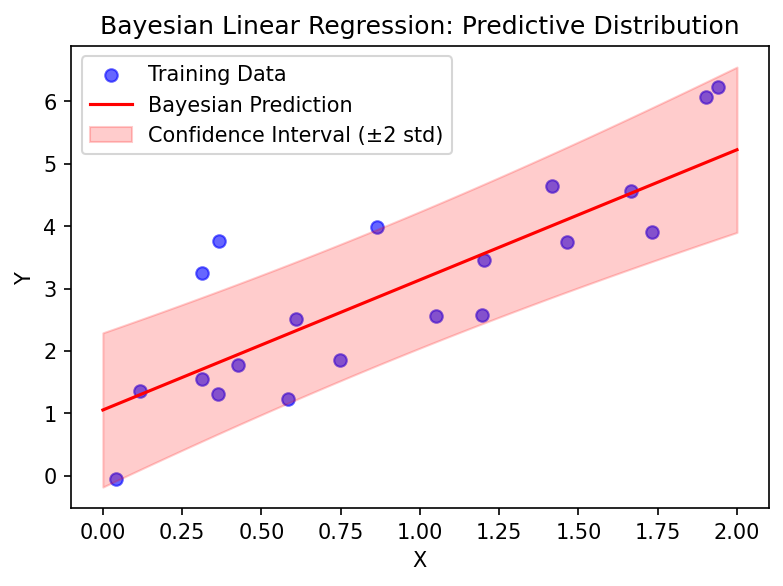

In [114]:
# Bayesian Linear Regression Visualization without Explicit mu_theta and Sigma_theta Calculation

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_samples = 20  # Number of training samples
X = 2 * np.random.rand(n_samples, 1)  # Input features (column vector)
true_theta = np.array([2.5])  # True parameter theta (slope)
true_bias = 1.0  # Bias term (intercept)
sigma_model = 1.0  # Noise in the original data generation process (σ)
sigma_pred = 0.5  # Prediction model noise (σ*)

# Generate noisy observations
Y = true_theta * X + true_bias + np.random.normal(0, sigma_model, (n_samples, 1))

# Add bias term to X (to handle intercept in linear regression)
X_b = np.vstack([np.ones((1, n_samples)), X.T])  # (d x n), where d=2

# Regularization strength λ
lambda_reg = 1.0  

# Compute predictive mean and variance directly
X_test = np.linspace(0, 2, 100).reshape(1, -1)  # Row vector for test points
X_test_b = np.vstack([np.ones((1, X_test.shape[1])), X_test])  # Add bias

# Compute (X X^T + λI)⁻¹ once
inv_term = np.linalg.inv(X_b @ X_b.T + lambda_reg * np.eye(2))

# Predictive mean: μ_Y* = X*^T (X X^T + λI)⁻¹ X Y
mu_Y_star = (X_test_b.T @ inv_term @ X_b @ Y).flatten()

# Predictive variance: σ²_Y* = σ² X*^T (X X^T + λI)⁻¹ X* + σ*²
sigma_Y_star_sq = np.array([X_test_b[:, i].T @ inv_term @ X_test_b[:, i] for i in range(X_test.shape[1])])
sigma_Y_star_sq = sigma_model**2 * sigma_Y_star_sq + sigma_pred**2  # Add model noise σ*²

# Compute standard deviation for confidence intervals
std_Y_star = np.sqrt(sigma_Y_star_sq)

# Plot results
plt.figure(figsize=(6, 4),dpi=150)
plt.scatter(X, Y, color="blue", label="Training Data", alpha=0.6)
plt.plot(X_test.flatten(), mu_Y_star, "r-", label="Bayesian Prediction")
plt.fill_between(
    X_test.flatten(),
    mu_Y_star - 2 * std_Y_star,
    mu_Y_star + 2 * std_Y_star,
    color="red",
    alpha=0.2,
    label="Confidence Interval (±2 std)",
)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bayesian Linear Regression: Predictive Distribution")
plt.legend()
plt.show()


#### 6.Kernel Methods

In [107]:
X = 10 * np.random.rand(n, 1)  # Training features
print(np.hstack([np.ones((n, 1)), X]))  # Add intercept term

[[1.         3.56738025]
 [1.         1.90153401]
 [1.         7.04382485]
 [1.         3.35281176]
 [1.         1.92997037]
 [1.         0.89963339]
 [1.         6.74767063]
 [1.         1.91868622]
 [1.         5.1734293 ]
 [1.         9.12930173]
 [1.         9.35821799]
 [1.         8.04563476]
 [1.         4.22098058]
 [1.         6.40030424]
 [1.         9.87677189]
 [1.         6.42182534]
 [1.         2.75200296]
 [1.         0.73357214]
 [1.         5.61738006]
 [1.         5.47080699]
 [1.         2.45629222]
 [1.         5.56667986]
 [1.         0.68112517]
 [1.         7.78461343]
 [1.         7.97490135]
 [1.         1.81697886]
 [1.         7.62965464]
 [1.         6.43952377]
 [1.         7.3448214 ]
 [1.         6.03480341]]
